<h1 style="font-family: 'Times New Roman;"><center>Custmer review classification using Machine learning</center></h1>
<h2 style="font-family: 'Times New Roman;"><center>Guide :- Prof. Sonali Sethi</center></h2>
<div style = "padding-left:15%;">
Group no. :- 18

Group members:-


1. Aditya Kulkarni 
2. Om Prakash
3. Radhe Shyam Thakur
</div>



<div style ="padding-left:9%;"> 

# File Structure
* Importing required packages
* Data Selection
* EDA
* Data preprocessing
* TF-IDF Vectorizer
* Spliting data for training
* Training Models
* Evaluating Models
</div>

## <h2 style ="padding-left:9%;">1. Importing requried packages</h2>

In [20]:
#Importing required library
import gc
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
import IProgress
#

#for word processing
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
#sklearn 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
# sklearn ML models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# Optimizing the sklearn modeules
from sklearnex import patch_sklearn 
patch_sklearn()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## <h2 style ="padding-left:9%;" >2. Data Selection</h2>

In [3]:
# Reading the Amazon review dataset.
df = pd.read_json('./Datasets/Electronics_5.json', lines = True)
df.dropna(inplace=True)

In [4]:
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:
def hcal(lst):
  if lst[1]>4:
    if ((lst[0]/lst[1])*100)>70:
      return True
    elif ((lst[0]/lst[1])*100)<40:
      return False

In [6]:
df['label'] = df['helpful'].apply(hcal)

In [7]:
df.dropna(inplace=True)
df = df[['reviewText','label','helpful']]

In [8]:
df.head(5)

,reviewText,label,helpful
1,"I'm a professional OTR truck driver, and I bou...",True,"[12, 15]"
2,"Well, what can I say. I've had this unit in m...",True,"[43, 45]"
3,"Not going to write a long review, even thought...",True,"[9, 10]"
26,I used this for my 47&#34; Samsung. Its fit/fe...,True,"[7, 9]"
56,Quality was excellent. Instructions were clear...,True,"[15, 19]"


In [9]:
df.label.value_counts()

True     152222
False     21389
Name: label, dtype: int64

In [10]:
tdf = df[df['label']== True]
fdf = df[df['label']== False]

In [11]:
print(len(tdf))
print(len(fdf))

152222
21389


In [ ]:
df = pd.concat([tdf.head(50000),fdf])
df.reset_index(drop=True)

In [13]:
df.head(5)

,reviewText,label,helpful
1,"I'm a professional OTR truck driver, and I bou...",True,"[12, 15]"
2,"Well, what can I say. I've had this unit in m...",True,"[43, 45]"
3,"Not going to write a long review, even thought...",True,"[9, 10]"
26,I used this for my 47&#34; Samsung. Its fit/fe...,True,"[7, 9]"
56,Quality was excellent. Instructions were clear...,True,"[15, 19]"


In [15]:
df.to_csv('./Datasets/fake_genuine.csv')

## <h2 style ="padding-left:9%;" >3. Exploratory Data Anylysis</h2>

In [17]:
df = pd.read_csv('./Datasets/fake_genuine.csv')
df.dropna(inplace=True)
#df.text = df.reviewText.astype(str)

   Unnamed: 0                                         reviewText  label  \
0           1  I'm a professional OTR truck driver, and I bou...   True   
1           2  Well, what can I say.  I've had this unit in m...   True   
2           3  Not going to write a long review, even thought...   True   
3          26  I used this for my 47&#34; Samsung. Its fit/fe...   True   
4          56  Quality was excellent. Instructions were clear...   True   

    helpful  
0  [12, 15]  
1  [43, 45]  
2   [9, 10]  
3    [7, 9]  
4  [15, 19]  

Total no. :-  71281
True  :-  49908
False :-  21373



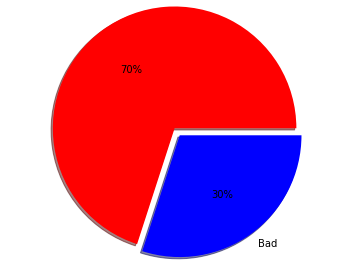

In [18]:
# Printing anylysis
print(df.head(5))
print('\nTotal no. :- ',len(df))
print('True  :- ',df.label.value_counts()[1])
print('False :- ',df.label.value_counts()[0])
print()
#plotting pie chart
val = df.label.value_counts()
plt.axis('equal')
plt.pie([val.iloc[0],val.iloc[1]],labels =['','Bad'], colors=['red','blue'],autopct='%.0f%%', radius= 1.4,shadow=True, explode = (0,0.1))
plt.show()

## <h2 style ="padding-left:9%;" >4. Data preprocessing</h2>
<div style ="padding-left:2%;">
<ul>
<li>Lower case</li>
<li> Tokenization</li>
<li>Filtering on given pos tag</li>
<li>Stopwords and punctuation removal</li>
<li>Lemmatization</li>
<li>Label Encoder</li>
</ul>
</div>

In [19]:
# Function to apply the preprocessing on given text
le = WordNetLemmatizer()
def transform_text(text):
    tag_lis = ['JJ',	'JJR',	'JJS','NNP'	'NNPS',	'RB',	'RBR',	'RBS',	'VB',	'VBG',	'VBD',	'VBN',	'VBP',	'VBZ']
    ## tokenize + case lowering
    text = nltk.word_tokenize(text.lower())
    # pos tagging
    ps = nltk.pos_tag(text)
    y = list()
    text.clear()
    for x,z in ps:
       if z in tag_lis:
           y.append(x)
    text = y[:]
    y.clear()
    ## isalpha checking 
    for i in text:
        if i.isalpha():
            # stopwords + punctuation removing + Lemmatization
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(le.lemmatize(i,pos = 'v'))
    return " ".join(y)

In [69]:
pdf = pd.read_csv('./Datasets/encoded-pos_tags.csv',encoding='utf-8')
def postr(text):
    text = nltk.word_tokenize(text.lower())
    lis1 = list()
    lis2 = list()
    ps = nltk.pos_tag(text)
    print()
    for x,y in ps:
        z = str(pdf.Description[pdf['Tag']==y].tolist()[0])
        lis1.append(x)
        lis2.append(str(z))
    tposdf = pd.DataFrame({'Text':lis1,'Tags':lis2})
    return tposdf

In [70]:
pdffinal = postr('Hello my name is vishal and I am very good person and my email is adityark0011@gmail.com')
print(pdffinal)


            Text                                               Tags
0          hello                         noun, singular (cat, tree)
1             my      possessive pronoun (her, his, mine, my, our )
2           name                         noun, singular (cat, tree)
3             is  verb, present tense with 3rd person singular (...
4         vishal          This NLTK POS Tag is an adjective (large)
5            and                           coordinating conjunction
6              i          This NLTK POS Tag is an adjective (large)
7             am  verb, present tense not 3rd person singular(wrap)
8           very                     adverb (occasionally, swiftly)
9           good          This NLTK POS Tag is an adjective (large)
10        person                         noun, singular (cat, tree)
11           and                           coordinating conjunction
12            my      possessive pronoun (her, his, mine, my, our )
13         email                         noun, 

In [20]:
transform_text('Hello my name is vishal and I am very good person and my email is adityark0011@gmail.com')

'vishal good'

In [21]:
transform_text('Hello my name is vishal and I am very good person and my email is adityark0011@gmail.com')

'vishal good'

In [22]:
#Applying transform text on text_final column 
df['text_final'] = df['reviewText'].progress_apply(transform_text)

  0%|          | 0/71281 [00:00<?, ?it/s]

In [23]:
#Saving the dataset
df.to_csv('./Datasets/data_processed.csv',index=False)

## <h2 style ="padding-left:9%;" >5. TF-IDF Vectorizor</h2>

In [5]:
#Import the pre-processed dataset for further processing.
df= pd.read_csv('./Datasets/data_processed.csv')
df.dropna(inplace=True)

In [6]:
# Using label encoder for converting labels
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [7]:
tfidf = TfidfVectorizer(max_features=1000,min_df=0.005)
X = tfidf.fit_transform(df['text_final']).toarray()
y = df['label'].values

In [8]:
pd.DataFrame(X,columns = tfidf.get_feature_names_out()).head()

,aa,able,absolutely,ac,accept,acceptable,accidentally,accord,accurate,achieve,...,worse,worst,worth,wrap,write,wrong,xp,yes,yet,zoom
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.091322,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.081178,0.165204,0.0,0.0,0.000000,0.0
3,0.0,0.190298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [9]:
pickle.dump(tfidf,open('./Model/Tf_idf_vectorizer.pkl','wb'))

## <h2 style ="padding-left:9%;" >6. Splitting data for training and testing</h2>

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5000)

In [30]:
del X,y,df,tfidf,encoder
gc.collect()

33

## <h2 style ="padding-left:9%;" >7. Training Machine learning models</h2>

### Training all algorithms

In [23]:
svc = SVC(kernel='rbf')
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [24]:
clfs = {
    'SV Classifier' : svc,
    'KN Neighbors Classifier' : knc, 
    'Multinomial Naive Bayes': mnb, 
    'Decision Tree': dtc, 
    'Losgistic Regression Classifier': lrc, 
    'Random Forest': rfc, 
    'AdaBoost': abc, 
    'Bagging Classifier': bc, 
    'Extra Tree Classifier': etc,
    'Gradingent Boosting Classifier':gbdt,
    'xgb':xgb
}

In [25]:
import math
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return math.floor(accuracy*100),math.floor(precision*100)

In [ ]:
accuracy_scores = []
precision_scores = []
for name,clf in tqdm_notebook(clfs.items()):
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    print(f"The accuracy  of {name}: ",current_accuracy)
    print(f"The precision of {name}: ",current_precision)

### Saving all models

In [15]:
# Saving all models
for name,clf in clfs.items():
    pickle.dump(clf,open(f'./Model/{name}_model_file.pkl','wb'))

## <h2 style ="padding-left:9%;" >8. Evaluating model</h2>

### Generating Table

In [16]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
print(performance_df)

                Algorithm  Accuracy  Precision
1  Support Vector Machine        79         81
0           Random Forest        76         78
